In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv', index_col=0)

## 변환
- value, wage, release clause 통화 단위
- work rate ex.hight/hight -> 숫자로 변환(0-2/0-2) -> 파생변수 wr
- 

In [3]:
# 통화 변환-> 실수화
def exchange(value):
    out = value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M',''))*1000
    elif 'K' in out:
        out = float(out.replace('K',''))
    return float(out)

In [4]:
df.Value = df.Value.apply(lambda x: exchange(x))
df.Wage = df.Wage.apply(lambda x: exchange(x))
df['Release Clause'] = df['Release Clause'].astype('str')
df['Release Clause'] = df['Release Clause'].apply(lambda x: exchange(x))

Work Rate -> 경기 중 공격 적극성, 수비 적극성
파생변수 WR = attack_wr+defence_wr

In [5]:
wr = df['Work Rate'].str.split('/', expand=True)
df['Attack_WR']= wr[0]
df['Attack_WR'].replace({'High':2, 'Medium':1,'Low':0},inplace= True)
df['Defence_WR']=wr[1]
df['Defence_WR'].replace({' High':2, ' Medium':1,' Low':0},inplace= True)
df['WR']=df['Attack_WR']+df['Defence_WR']

## 결측치가 많은 칼럼, 불필요한 칼럼 삭제
- nan 48행 삭제
- club 없는 행 삭제(Wage, value = 0유로)

In [264]:
# 결측치가 많은 칼럼이나 불필요한 칼럼 삭제결측치가 많은 칼럼이나 불필요한 칼럼 삭제

In [6]:
# nan 행 삭제
nan_data=df.iloc[13236:13284,:]
nan_data.index
df.drop(nan_data.index,inplace = True)

In [7]:
# club nan 행 탐색
df.Club.fillna('non_club', inplace = True)
non_club_s=df[df.Club =='non_club'].index
df.drop(non_club_s,inplace = True)  

In [8]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

## 파생변수 만들기

Age 범주화

In [9]:
# Age_C
def Age_2(x):
    if x <20 : return 1
    elif (20<= x <=22): return 2
    elif (23<= x <=24): return 3
    elif (25<= x <= 26): return 4
    elif (27<= x <= 29): return 5
    elif (30<= x <=31): return 6
    elif (32<= x <=33): return 7
    elif (34 ==x): return 8
    elif (35 <= x <= 38): return 9
    elif (39 ==x): return 10
    elif (40 <= x <= 45): return 11
df['Age_C'] = df.Age.apply(Age_2) 

Overall 범주화

In [10]:
# Over_C
def Over_2(x):
    if 46<= x <=62 : return 1
    elif 63<= x <=68 : return 2
    elif 69<= x <=72: return 3
    elif 73<= x <=75: return 4
    elif 76<= x <=78: return 5
    elif 79<= x <=80: return 6
    elif 81<= x <=82: return 7
    elif 83==x: return 8
    elif 84==x: return 9
    elif 85==x: return 10
    elif 86==x: return 11
    elif 87==x: return 12
    elif 88==x: return 13
    elif 89==x: return 14
    elif 90==x: return 15
    elif 91==x: return 16
    elif 92==x: return 17
    elif 93<= x <=94 : return 18
df['Over_C']=df.Overall.apply(Over_2)

Club 
1. Club_Value
2. Rich_Club
3. ~Overall_Club~

In [11]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

Club_Value

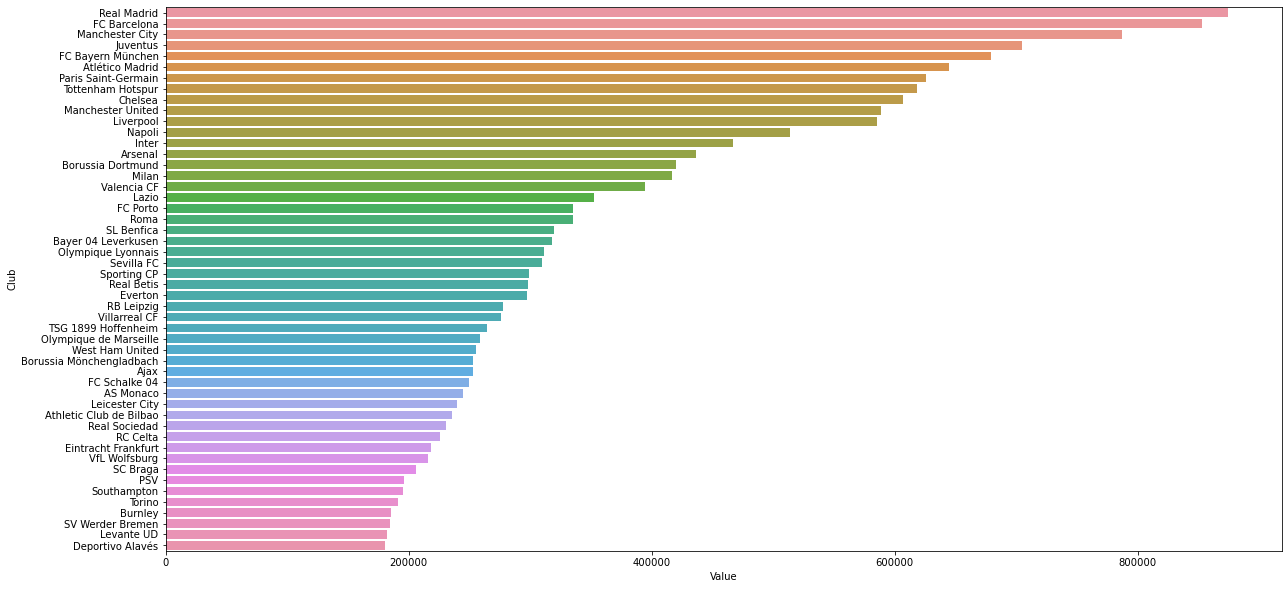

In [12]:
import seaborn as sns
# 클럽 구단 가치 
group = df.groupby('Club')['Value'].sum().reset_index().sort_values('Value', ascending = False).head(50)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Value', y = 'Club', data = group)

In [13]:
group = df.groupby(['Club'])[['Value']]
cmed= group.sum().sort_values(by=['Value'], ascending = False)
cmed.head()

,Value
Club,
Real Madrid,874425.0
FC Barcelona,852600.0
Manchester City,786555.0
Juventus,704475.0
FC Bayern München,679025.0


In [24]:
cmed.describe()

,Value
count,651.000000
mean,67395.591398
std,109255.819191
min,1930.000000
25%,15277.500000
50%,30520.000000
75%,65742.500000
max,874425.000000


In [ ]:
club1=list(cmed.query('Value>=65742.5').index)
club1
club2=list(cmed.query('Value>=30520 & Value<65742.5').index)
club2
club3=list(cmed.query('Value>=15277.5 & Value <30520').index)
club4=list(cmed.query('Value<15277.5').index)
df.insert(7,'Club_Value',
            df.apply(lambda x: 
            3 if x['Club'] in club1
            else 2 if x['Club'] in club2
            else 1 if x['Club'] in  club3
            else 0, axis =1))

Rich_Club

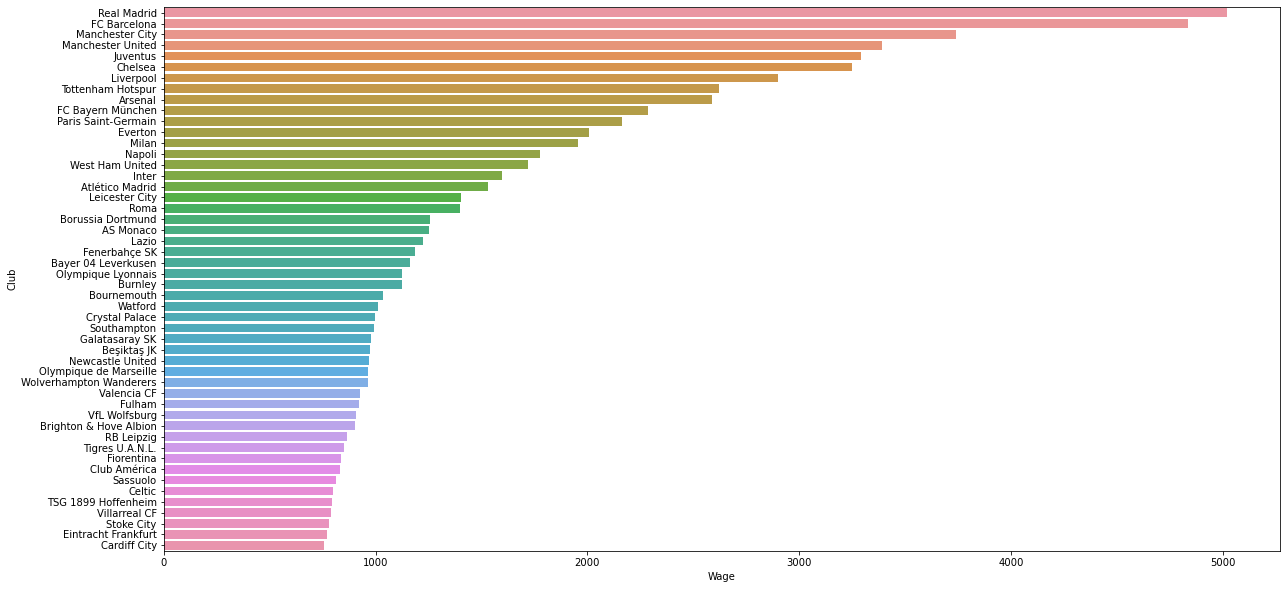

In [16]:
group3 = df.groupby('Club')['Wage'].sum().reset_index().sort_values('Wage', ascending = False).head(50)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Wage', y = 'Club', data = group3)

In [17]:
group3 = df.groupby(['Club'])[['Wage']]
cmed1= group3.sum().sort_values(by=['Wage'], ascending = False)

In [18]:
cmed1.describe()

,Wage
count,651.000000
mean,272.038402
std,499.444787
min,19.000000
25%,60.500000
50%,108.000000
75%,261.500000
max,5017.000000


In [19]:
club11=list(cmed1.query('Wage>=261.5').index)
club11
club22=list(cmed1.query('Wage>=108 & Wage<261.5').index)
club22
club33=list(cmed1.query('Wage>=60.5 & Wage <108').index)
club44=list(cmed1.query('Wage<60.5').index)
df.insert(7,'Rich_Club',
            df.apply(lambda x: 
            3 if x['Club'] in club11
            else 2 if x['Club'] in club22
            else 1 if x['Club'] in  club33
            else 0, axis =1))

## 불필요한 컬럼 1차 삭제
- 불필요
- 파생변수 만들 칼럼들:
- 다른 칼럼과 중복

In [27]:
df.drop(['Nationality','Work Rate','Photo', 'Flag','Club Logo',
        'ID','Body Type','Height', 'Weight',
        'Attack_WR', 'Defence_WR','Preferred Foot',
        'Release Clause','Attack_WR', 'Defence_WR'], axis=1, inplace = True)

# 파생변수 Period
2018.12.31 - df.Joined = df.Period

In [280]:
# joined, contract Valid Unitil(기간 계산기간 계산)

In [29]:
import datetime as dt
df['Joined'] = pd.to_datetime(df['Joined'])
today = dt.datetime(2018,12,31) # 가입일의 최고값이 12월 31일
df['Period']= today - df.Joined
df['Period']=df['Period'].apply(lambda x: round((x.days+1)/365,1))

In [30]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [31]:
df['Loaned From'].fillna(0,inplace=True)

# club소속 선수 vs 임대선수

In [32]:
def Loaned(df):
    if (df['Loaned From']==0):
        return 1 #구단 소속 선수
    else:
        return 0 # 임대선수
df['Loaned']=df.apply(Loaned,axis=1)

Special_sc
- potential = overal +나이 점수(어릴수록 높음)
- special = 

SUM('Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys','Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle') - ('Compouser' )

 그래서 special_psc = df.potential + df.special+ df.composure

In [33]:
df['Special_sc']=df.Special+df.Composure
# Special, Special+Composure, Potential+Special+Composure 영향력은 별 차이 없음(되려 떨어지기도?!)

In [36]:
def Special_sc(x):
    if x<2100: return 0
    elif 2100 <= x: return 1
df['Special_sc']= df.Special.apply(Special_sc)

Position_Score = 
가정,overall보다 Wage와 상관관계가 좋지 않을까?
FORWARD =LS+ST+RS+LW+LF+CF+RF+RW 점수 평균 -> OVERALL을 대체할수 있나?
MIDFIELDER = LAM+CAM+RAM+LM+LCM+CM+RCM+RM 점수 평균
DEFENDER=LWB+LDM+CDM+RDM+RWB+LB+LCB+CB+RCB+RB 점수 평균

In [37]:
# 파생변수 1 Position_Class
df.insert(9,'Position_Class',
            df.apply(lambda x: 
            'Forward' if x['Position'] in ['LS','ST','RS','LW','LF','CF','RF','RW']
            else 'Midfielder' if x['Position'] in ['LAM','CAM','RAM','LM','LCM','CM',
                                                   'RCM','RM']
            else 'Defender' if x['Position'] in  ['LWB','LDM','CDM','RDM','RWB','LB',
                                                  'LCB','CB','RCB','RB']
            else 'GoalKeeper', axis =1))

In [71]:
df1=df[df['Position']!='GK']
df1.head()

,Name,Age,Overall,Rich_Club,Club_Value,Potential,Club,Value,Wage,Position_Class,...,GKHandling,GKKicking,GKPositioning,GKReflexes,WR,Age_C,Over_C,Period,Loaned,Special_sc
0,L. Messi,31,94,3,3,94,FC Barcelona,110500.0,565.0,Forward,...,11.0,15.0,14.0,8.0,2.0,6,18,14.5,1,1
1,Cristiano Ronaldo,33,94,3,3,94,Juventus,77000.0,405.0,Forward,...,11.0,15.0,14.0,11.0,2.0,7,18,0.5,1,1
2,Neymar Jr,26,92,3,3,93,Paris Saint-Germain,118500.0,290.0,Forward,...,9.0,15.0,15.0,11.0,3.0,4,17,1.4,1,1
4,K. De Bruyne,27,91,3,3,92,Manchester City,102000.0,355.0,Midfielder,...,13.0,5.0,10.0,13.0,4.0,5,16,3.3,1,1
5,E. Hazard,27,91,3,3,91,Chelsea,93000.0,340.0,Forward,...,12.0,6.0,8.0,8.0,3.0,5,16,6.5,1,1


In [72]:
def exchange1(value): # +분리
    out1 = value.split('+')[0]
    out2 = value.split('+')[1]
    return int(out1)+int(out2)  

In [73]:
df1.LS = df1.LS.apply(lambda x: exchange1(x))
df1.ST = df1.ST.apply(lambda x: exchange1(x))
df1.RS = df1.RS.apply(lambda x: exchange1(x))
df1.LW = df1.LW.apply(lambda x: exchange1(x))
df1.LF = df1.LF.apply(lambda x: exchange1(x))
df1.CF = df1.CF.apply(lambda x: exchange1(x))
df1.RF = df1.RF.apply(lambda x: exchange1(x))
df1.RW = df1.RW.apply(lambda x: exchange1(x))
df1.LAM = df1.LAM.apply(lambda x: exchange1(x))
df1.CAM = df1.CAM.apply(lambda x: exchange1(x))
df1.RAM = df1.RAM.apply(lambda x: exchange1(x))
df1.LM = df1.LM.apply(lambda x: exchange1(x))
df1.LCM = df1.LCM.apply(lambda x: exchange1(x))
df1.CM = df1.CM.apply(lambda x: exchange1(x))
df1.RCM = df1.RCM.apply(lambda x: exchange1(x))
df1.RM = df1.RM.apply(lambda x: exchange1(x))
df1.LWB = df1.LWB.apply(lambda x: exchange1(x))
df1.LDM = df1.LDM.apply(lambda x: exchange1(x))
df1.CDM = df1.CDM.apply(lambda x: exchange1(x))
df1.RDM = df1.RDM.apply(lambda x: exchange1(x))
df1.RWB = df1.RWB.apply(lambda x: exchange1(x))
df1.LB = df1.LB.apply(lambda x: exchange1(x))
df1.LCB = df1.LCB.apply(lambda x: exchange1(x))
df1.CB = df1.CB.apply(lambda x: exchange1(x))
df1.RCB = df1.RCB.apply(lambda x: exchange1(x))
df1.RB = df1.RB.apply(lambda x: exchange1(x))

In [74]:
forw=['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
mid=['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']
defen=['LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

In [75]:
df1['forward']=df1[forw].mean(axis=1).round(0)
df1['midfielder']=df1[mid].mean(axis=1).round(0)
df1['defender']=df1[defen].mean(axis=1).round(0)

In [76]:
df1['Position_Score']=np.nan

In [77]:
df1.iloc[:,86:90].head()

,forward,midfielder,defender,Position_Score
0,93.0,91.0,59.0,NaN
1,93.0,88.0,62.0,NaN
2,90.0,89.0,60.0,NaN
4,88.0,91.0,76.0,NaN
5,89.0,89.0,62.0,NaN


In [78]:
for i in range(len(df1)):
    if df1.iloc[i, 9] == 'Forward':
        df1.iloc[i, 89] = df1.iloc[i,86]
    elif df1.iloc[i, 9] == 'Midfielder':
        df1.iloc[i, 89] = df1.iloc[i,87]
    elif df1.iloc[i, 9] == 'Defender':
        df1.iloc[i, 89] = df1.iloc[i,88]

In [79]:
df1.iloc[:,86:90].head()

,forward,midfielder,defender,Position_Score
0,93.0,91.0,59.0,93.0
1,93.0,88.0,62.0,93.0
2,90.0,89.0,60.0,90.0
4,88.0,91.0,76.0,91.0
5,89.0,89.0,62.0,89.0


In [80]:
df1.drop(['forward','midfielder','defender'], axis=1, inplace=True)

In [81]:
df_GK=df[df['Position']=='GK']
df_GK.head()

,Name,Age,Overall,Rich_Club,Club_Value,Potential,Club,Value,Wage,Position_Class,...,GKHandling,GKKicking,GKPositioning,GKReflexes,WR,Age_C,Over_C,Period,Loaned,Special_sc
3,De Gea,27,91,3,3,93,Manchester United,72000.0,260.0,GoalKeeper,...,85.0,87.0,88.0,94.0,2.0,5,16,7.5,1,0
9,J. Oblak,25,90,3,3,93,Atlético Madrid,68000.0,94.0,GoalKeeper,...,92.0,78.0,88.0,89.0,2.0,4,15,4.5,1,0
18,M. ter Stegen,26,89,3,3,92,FC Barcelona,58000.0,240.0,GoalKeeper,...,85.0,88.0,85.0,90.0,2.0,4,14,4.5,1,0
19,T. Courtois,26,89,3,3,90,Real Madrid,53500.0,240.0,GoalKeeper,...,91.0,72.0,86.0,88.0,2.0,4,14,0.4,1,0
22,M. Neuer,32,89,3,3,89,FC Bayern München,38000.0,130.0,GoalKeeper,...,86.0,91.0,87.0,87.0,2.0,7,14,7.5,1,0


In [82]:
df_GK['Position_Score']=np.nan

In [83]:
df_GK.iloc[:,86].head()

3    NaN
9    NaN
18   NaN
19   NaN
22   NaN
Name: Position_Score, dtype: float64

In [84]:
for i in range(len(df_GK)):
    if df_GK.iloc[i, 9] == 'GoalKeeper':
        df_GK.iloc[i, 86] = df_GK.iloc[i,2] #overall값 그대로 적용

In [85]:
df_GK.iloc[:,86].head()

3     91.0
9     90.0
18    89.0
19    89.0
22    89.0
Name: Position_Score, dtype: float64

In [86]:
df_all = pd.concat([df1,df_GK]) 

In [87]:
df_all.head()

,Name,Age,Overall,Rich_Club,Club_Value,Potential,Club,Value,Wage,Position_Class,...,GKKicking,GKPositioning,GKReflexes,WR,Age_C,Over_C,Period,Loaned,Special_sc,Position_Score
0,L. Messi,31,94,3,3,94,FC Barcelona,110500.0,565.0,Forward,...,15.0,14.0,8.0,2.0,6,18,14.5,1,1,93.0
1,Cristiano Ronaldo,33,94,3,3,94,Juventus,77000.0,405.0,Forward,...,15.0,14.0,11.0,2.0,7,18,0.5,1,1,93.0
2,Neymar Jr,26,92,3,3,93,Paris Saint-Germain,118500.0,290.0,Forward,...,15.0,15.0,11.0,3.0,4,17,1.4,1,1,90.0
4,K. De Bruyne,27,91,3,3,92,Manchester City,102000.0,355.0,Midfielder,...,5.0,10.0,13.0,4.0,5,16,3.3,1,1,91.0
5,E. Hazard,27,91,3,3,91,Chelsea,93000.0,340.0,Forward,...,6.0,8.0,8.0,3.0,5,16,6.5,1,1,89.0


In [63]:
lm_fifa1=smf.ols('Wage~ Position_Score', data=df_all).fit()
lm_fifa1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     8245.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:40:59   Log-Likelihood:                -77534.
No. Observations:               17918   AIC:                         1.551e+05
Df Residuals:                   17916   BIC:                         1.551e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -106.5011      1.289    -82.621      0.000    -109.028    -103.974
Position_Score     1.7898      0.020     90.802      0.000       1.751       1.828
==============================================================================
Omnibus:                    25266.598   Durbin-Watson:                   0.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11407730.159
Skew:                           8.203   Prob(JB):                         0.00
Kurtosis:                     125.518   Cond. No.                         616.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
lm_fifa2=smf.ols('Wage~ Overall', data=df_all).fit()
lm_fifa2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     8893.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:41:23   Log-Likelihood:                -77315.
No. Observations:               17918   AIC:                         1.546e+05
Df Residuals:                   17916   BIC:                         1.546e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -112.0216      1.300    -86.185      0.000    -114.569    -109.474
Overall        1.8404      0.020     94.301      0.000       1.802       1.879
==============================================================================
Omnibus:                    25427.808   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11978267.913
Skew:                           8.292   Prob(JB):                         0.00
Kurtosis:                     128.575   Cond. No.                         640.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Club_Overall 합친 파생변수


-Wage와 상관관계가 매우 높지만..
범주화에 부족한 부분이 있는 듯해서 사용 x

In [312]:
# df_all['Club_Overall']=np.nan
# bins = [0,73, 80, 85, 99]
# group_names=[0,1,2,3]
# df_all['Overall_div']=pd.cut(df_all['Overall'], bins, labels=group_names, include_lowest=True)

# for i in range(len(df_all)):
#     if df_all.iloc[i, 7] == 4: # club1 그룹 이내
#         if df_all.iloc[i,33] ==3: # overall 85 이상
#             df_all.iloc[i, 32] = 3
#         elif df_all.iloc[i,33] ==2: # overall 80이상, 85 미만
#             df_all.iloc[i, 32] = 2
#         elif df_all.iloc[i,33] ==1: # overall 73이상, 80 미만
#             df_all.iloc[i, 32] = 1
#         else:
#             df_all.iloc[i, 32] = 0    
            
#     elif df_all.iloc[i, 7] == 3: # club2 그룹 이내
#         if df_all.iloc[i,33] ==3: # overall 85 이상 (거의 없음)
#             df_all.iloc[i, 32] = 2 
#         elif df_all.iloc[i,33] ==2: # overall 80 이상, 85 미만
#             df_all.iloc[i,32] = 1
#         else:
#             df_all.iloc[i,32] =0
            
#     elif df_all.iloc[i, 7] == 2: # club3 그룹 이내
#         if df_all.iloc[i,33] >= 2: # overall 80이상
#             df_all.iloc[i,32] =1
#         else:
#             df_all.iloc[i,32] =0
#     else: # 클럽 4분위수는 거의 연봉이 1000임
#         df_all.iloc[i,32]=0

##  불필요한 컬럼 2차 삭제

In [88]:
df_all.drop([ 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'], axis=1, inplace=True)

In [89]:
df_all.drop(['Special','Weak Foot', 'Skill Moves','Position', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Composure'],axis=1, inplace=True)

In [90]:
df_all.columns

Index(['Name', 'Age', 'Overall', 'Rich_Club', 'Club_Value', 'Potential',
       'Club', 'Value', 'Wage', 'Position_Class', 'International Reputation',
       'Real Face', 'Jersey Number', 'WR', 'Age_C', 'Over_C', 'Period',
       'Loaned', 'Special_sc', 'Position_Score'],
      dtype='object')

Real Face

In [91]:
df_all['Real_Face']=df_all['Real Face']
df_all.drop('Real Face', axis=1, inplace=True)
df_all['Real_Face'].replace({'Yes':1, 'No':0},inplace= True)

In [69]:
im_model4 = smf.ols(formula = 'Wage~Real_Face',data = df_all).fit()
im_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     5832.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:44:27   Log-Likelihood:                -78401.
No. Observations:               17918   AIC:                         1.568e+05
Df Residuals:                   17916   BIC:                         1.568e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3845      0.151     42.334      0.000       6.089       6.680
Real_Face     37.9075      0.496     76.368      0.000      36.935      38.880
==============================================================================
Omnibus:                    24148.219   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9516248.892
Skew:                           7.538   Prob(JB):                         0.00
Kurtosis:                     114.889   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# Position 실수화
df_all['Position_Class'].replace({'Forward':3, 'Midfielder':2, 'Defender':1, 'GoalKeeper':0}, inplace = True)

In [94]:
df_all.to_csv('fifa_0315.csv')

In [6]:
df_all=pd.read_csv('fifa_0315.csv', index_col=0)

In [4]:
df_all.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Overall', 'Rich_Club', 'Club_Value',
       'Potential', 'Club', 'Value', 'Wage', 'Position_Class',
       'International Reputation', 'Jersey Number', 'WR', 'Age_C', 'Over_C',
       'Period', 'Loaned', 'Special_sc', 'Position_Score', 'Real_Face'],
      dtype='object')

In [9]:
df_all.sort_values(by='Overall',ascending = True )[['Name', 'Overall']]

,Name,Overall
18206,G. Nugent,46
18198,J. Livesey,47
18194,J. Milli,47
18205,D. Walker-Rice,47
18204,B. Worman,47
...,...,...
5,E. Hazard,91
4,K. De Bruyne,91
2,Neymar Jr,92
1,Cristiano Ronaldo,94


In [11]:
piv = pd.pivot_table(df_all,
                     index = 'Real_Face',
                     values = 'Wage',
                     aggfunc ='count')
piv

,Wage
Real_Face,
0,16264
1,1654
